# Analysis for 20230703-090301.xlsx

## 0. Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from ast import literal_eval
from typing import List, Union
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
from scipy import interpolate
import calendar
import ast
from collections import ChainMap
import yaml
from IPython.display import display
pd.options.display.max_columns = None
plt.style.use('seaborn-whitegrid')

C:\Users\ikdlo\AppData\Local\Temp\ipykernel_16424\3595099957.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Read the data

In [2]:
excel_sheet_path = r'C:\python\personal\my-open\notebooks\20230703-090301\data\20230703-090301.xlsx'
data = pd.read_excel(excel_sheet_path, engine='openpyxl')

In [3]:
data.head()

FolderName  \
0  20230703-090332_1_Commercial-275-bed Hospital   
1  20230703-090401_2_Commercial-275-bed Hospital   
2  20230703-090430_3_Commercial-275-bed Hospital   
3  20230703-090500_4_Commercial-275-bed Hospital   
4  20230703-090530_5_Commercial-275-bed Hospital   

   rated_photovoltaic_kilowatts  simulation_time_series_resolution_in_minutes  \
0                           400                                             1   
1                           400                                             1   
2                           400                                             1   
3                           400                                             1   
4                           400                                             1   

   energy_management_system_time_series_resolution_in_minutes  \
0                                                 15            
1                                                 15            
2                                                 15            
3                                                 15            
4                                                 15            

   max_storage_asset_energy_in_kilowatt_hour  \
0                                        500   
1                                        500   
2                                        500   
3                                        500   
4                                        500   

   min_storage_asset_energy_in_kilowatt_hour  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   max_storage_asset_active_power_in_kilowatts  \
0                                          500   
1                                          500   
2                                          500   
3                                          500   
4                                          500   

   min_storage_asset_active_power_in_kilowatts  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   initial_storage_asset_energy_level_percentage  \
0                                             80   
1                                             80   
2                                             80   
3                                             80   
4                                             80   

   required_storage_asset_terminal_energy_level_percentage  \
0                                                100         
1                                                100         
2                                                100         
3                                                100         
4                                                100         

   storage_asset_absolute_active_power_in_kilowatts  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   storage_asset_degradation_ratio_in_euros_per_kilowatt_hour  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   storage_asset_charging_efficiency_percentage  \
0                                           100   
1                                           100   
2                                           100   
3                                           100   
4   

In [4]:
data.shape

(72, 69)

In [5]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

## 2.Reformat list columns

The list or array type columns are displayed as string type, let's modify them:

In [6]:
# Format storage_asset_active_power_in_kilowatts column
storage_asset_active_power_in_kilowatts_list = []
for _, row in data.iterrows():
    storage_asset_active_power_in_kilowatts = float(row.storage_asset_active_power_in_kilowatts.split(',')[0].split('[')[1])
    storage_asset_active_power_in_kilowatts_list.append(storage_asset_active_power_in_kilowatts)
data['storage_asset_active_power_in_kilowatts'] = storage_asset_active_power_in_kilowatts_list

In [7]:
for column in data.columns:
    try:
        data[column] = data[column].map(literal_eval)
    except:
        print(f'{column} column not possible to transform')

FolderName column not possible to transform
rated_photovoltaic_kilowatts column not possible to transform
simulation_time_series_resolution_in_minutes column not possible to transform
energy_management_system_time_series_resolution_in_minutes column not possible to transform
max_storage_asset_energy_in_kilowatt_hour column not possible to transform
min_storage_asset_energy_in_kilowatt_hour column not possible to transform
max_storage_asset_active_power_in_kilowatts column not possible to transform
min_storage_asset_active_power_in_kilowatts column not possible to transform
initial_storage_asset_energy_level_percentage column not possible to transform
required_storage_asset_terminal_energy_level_percentage column not possible to transform
storage_asset_absolute_active_power_in_kilowatts column not possible to transform
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour column not possible to transform
storage_asset_charging_efficiency_percentage column not possible to transform


In [8]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

Get the columns that have an array like format (array, list, etc.):

In [9]:
list_columns = []
for column in data.columns:
    print(column)
    print(type(column))
    if isinstance(data[column][0], list):
        list_columns.append(column)

FolderName
<class 'str'>
rated_photovoltaic_kilowatts
<class 'str'>
simulation_time_series_resolution_in_minutes
<class 'str'>
energy_management_system_time_series_resolution_in_minutes
<class 'str'>
max_storage_asset_energy_in_kilowatt_hour
<class 'str'>
min_storage_asset_energy_in_kilowatt_hour
<class 'str'>
max_storage_asset_active_power_in_kilowatts
<class 'str'>
min_storage_asset_active_power_in_kilowatts
<class 'str'>
initial_storage_asset_energy_level_percentage
<class 'str'>
required_storage_asset_terminal_energy_level_percentage
<class 'str'>
storage_asset_absolute_active_power_in_kilowatts
<class 'str'>
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour
<class 'str'>
storage_asset_charging_efficiency_percentage
<class 'str'>
storage_asset_charging_efficiency_for_the_optimizer_percentage
<class 'str'>
max_inside_degree_celsius
<class 'str'>
min_inside_degree_celsius
<class 'str'>
initial_inside_degree_celsius
<class 'str'>
max_consumed_electric_heating_kilowatts
<class

Check the list column lengths:

In [10]:
for list_column in list_columns:
    print(f'{list_column} length: {len(data[list_column])}')

market_active_power_in_kilowatts length: 72
market_reactive_power_in_kilovolt_ampere_reactive length: 72
active_power_demand_in_kilowatts length: 72
active_power_demand_base_in_kilowatts length: 72
imported_active_power_in_kilowatts length: 72
exported_active_power_in_kilowatts length: 72
building_power_consumption_in_kilowatts length: 72
ambient_temperature_in_degree_celsius length: 72
building_internal_temperature_in_celsius_degrees length: 72
hvac_active_power_in_kilowatts length: 72
storage_asset_accumulated_power_in_kilowatts length: 72
storage_asset_charge_or_discharge_power_in_kilowatts length: 72
storage_asset_energy_level_in_kilowatt_hour length: 72


## 3. Imports and Exports

In [11]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

In [12]:
data['ImportskW'] = data['storage_asset_charge_or_discharge_power_in_kilowatts'] + data['hvac_active_power_in_kilowatts']
len(data['ImportskW'])

72

In [13]:
exported_list = []
for index, row in data.iterrows():
    exports = np.array(data['active_power_demand_base_in_kilowatts'].iloc[index]) - data['active_power_demand_base_in_kilowatts'].iloc[index][0]
    exported_list.append(exports)

data['ExportskW'] = exported_list
data.head(3)

FolderName  \
0  20230703-090332_1_Commercial-275-bed Hospital   
1  20230703-090401_2_Commercial-275-bed Hospital   
2  20230703-090430_3_Commercial-275-bed Hospital   

   rated_photovoltaic_kilowatts  simulation_time_series_resolution_in_minutes  \
0                           400                                             1   
1                           400                                             1   
2                           400                                             1   

   energy_management_system_time_series_resolution_in_minutes  \
0                                                 15            
1                                                 15            
2                                                 15            

   max_storage_asset_energy_in_kilowatt_hour  \
0                                        500   
1                                        500   
2                                        500   

   min_storage_asset_energy_in_kilowatt_hour  \
0                                          0   
1                                          0   
2                                          0   

   max_storage_asset_active_power_in_kilowatts  \
0                                          500   
1                                          500   
2                                          500   

   min_storage_asset_active_power_in_kilowatts  \
0                                            0   
1                                            0   
2                                            0   

   initial_storage_asset_energy_level_percentage  \
0                                             80   
1                                             80   
2                                             80   

   required_storage_asset_terminal_energy_level_percentage  \
0                                                100         
1                                                100         
2                                                100         

   storage_asset_absolute_active_power_in_kilowatts  \
0                                               NaN   
1                                               NaN   
2                                               NaN   

   storage_asset_degradation_ratio_in_euros_per_kilowatt_hour  \
0                                                NaN            
1                                                NaN            
2                                                NaN            

   storage_asset_charging_efficiency_percentage  \
0                                           100   
1                                           100   
2                                           100   

   storage_asset_charging_efficiency_for_the_optimizer_percentage  \
0                                                100                
1                                                100                
2                                                100                

   max_inside_degree_celsius  min_inside_degree_celsius  \
0                         25                         21   
1                         25                         21   
2                         25                         21   

   initial_inside_degree_celsius  max_consumed_electric_heating_kilowatts  \
0                             21                                      400   
1                             21                                      400   
2                             21                                      400   

   max_consumed_electric_cooling_kilowatts  \
0                                      400   
1                                      400   
2                                      400   

   heat_pump_coefficient_of_performance  chiller_coefficient_of_performance  \
0                                     3                                   1   
1                                     3                                   1   
2                                     3                          

In [14]:
len(data['hvac_active_power_in_kilowatts'].iloc[0])

1440

In [15]:
def increase_array_shape(input_list: List, new_shape: int) -> np.ndarray:
    array =  np.array(input_list)
    array_length = array.shape[0]
    reshape_factor = new_shape / array_length
    return np.repeat(array, reshape_factor)

In [16]:
data['reshaped_storage_asset_charge_or_discharge_power_in_kilowatts'] = data['storage_asset_charge_or_discharge_power_in_kilowatts'].apply(lambda x: increase_array_shape(x, 1440))
data.head(3)

FolderName  \
0  20230703-090332_1_Commercial-275-bed Hospital   
1  20230703-090401_2_Commercial-275-bed Hospital   
2  20230703-090430_3_Commercial-275-bed Hospital   

   rated_photovoltaic_kilowatts  simulation_time_series_resolution_in_minutes  \
0                           400                                             1   
1                           400                                             1   
2                           400                                             1   

   energy_management_system_time_series_resolution_in_minutes  \
0                                                 15            
1                                                 15            
2                                                 15            

   max_storage_asset_energy_in_kilowatt_hour  \
0                                        500   
1                                        500   
2                                        500   

   min_storage_asset_energy_in_kilowatt_hour  \
0                                          0   
1                                          0   
2                                          0   

   max_storage_asset_active_power_in_kilowatts  \
0                                          500   
1                                          500   
2                                          500   

   min_storage_asset_active_power_in_kilowatts  \
0                                            0   
1                                            0   
2                                            0   

   initial_storage_asset_energy_level_percentage  \
0                                             80   
1                                             80   
2                                             80   

   required_storage_asset_terminal_energy_level_percentage  \
0                                                100         
1                                                100         
2                                                100         

   storage_asset_absolute_active_power_in_kilowatts  \
0                                               NaN   
1                                               NaN   
2                                               NaN   

   storage_asset_degradation_ratio_in_euros_per_kilowatt_hour  \
0                                                NaN            
1                                                NaN            
2                                                NaN            

   storage_asset_charging_efficiency_percentage  \
0                                           100   
1                                           100   
2                                           100   

   storage_asset_charging_efficiency_for_the_optimizer_percentage  \
0                                                100                
1                                                100                
2                                                100                

   max_inside_degree_celsius  min_inside_degree_celsius  \
0                         25                         21   
1                         25                         21   
2                         25                         21   

   initial_inside_degree_celsius  max_consumed_electric_heating_kilowatts  \
0                             21                                      400   
1                             21                                      400   
2                             21                                      400   

   max_consumed_electric_cooling_kilowatts  \
0                                      400   
1                                      400   
2                                      400   

   heat_pump_coefficient_of_performance  chiller_coefficient_of_performance  \
0                                     3                                   1   
1                                     3                                   1   
2                                     3                          

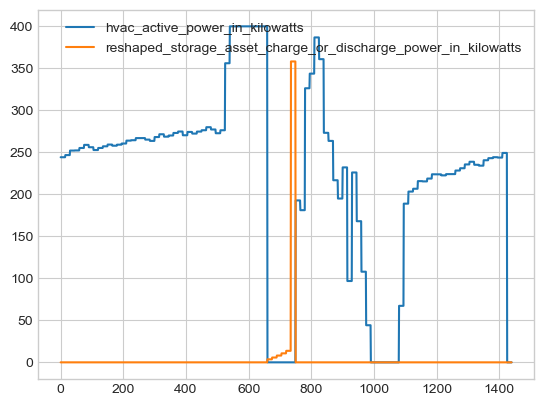

In [17]:
plt.plot(data['hvac_active_power_in_kilowatts'].iloc[0], label='hvac_active_power_in_kilowatts')
plt.plot(data['reshaped_storage_asset_charge_or_discharge_power_in_kilowatts'].iloc[0], label='reshaped_storage_asset_charge_or_discharge_power_in_kilowatts')
plt.legend()


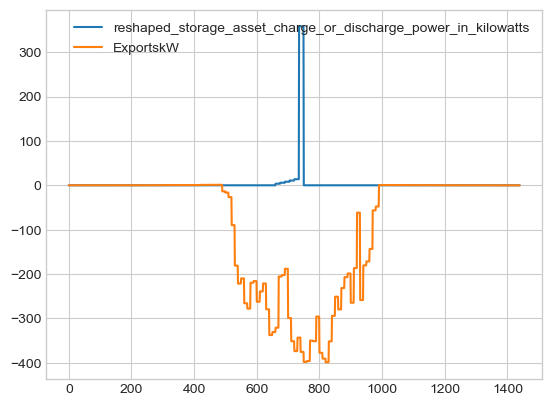

In [18]:
plt.plot(data['reshaped_storage_asset_charge_or_discharge_power_in_kilowatts'].iloc[0], label='reshaped_storage_asset_charge_or_discharge_power_in_kilowatts')
plt.plot(data['ExportskW'].iloc[0], label='ExportskW')
plt.legend()

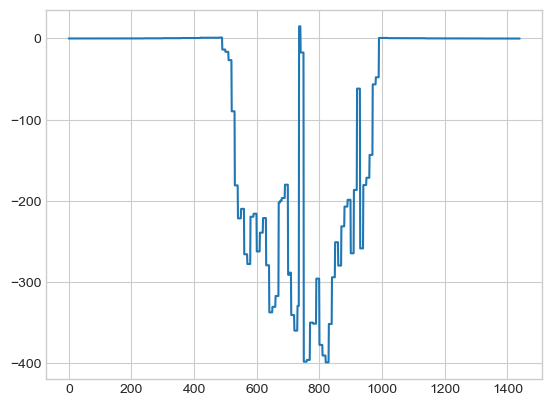

In [19]:
data['ArrangedExports'] = data['ExportskW'] + data['reshaped_storage_asset_charge_or_discharge_power_in_kilowatts']
plt.plot(data['ArrangedExports'].iloc[0])

In [20]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

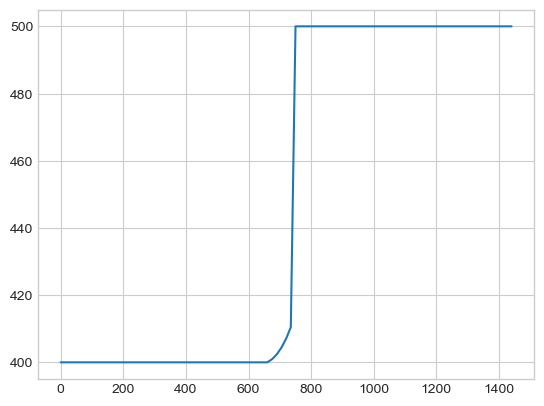

In [21]:
plt.plot(data['storage_asset_energy_level_in_kilowatt_hour'].iloc[0])


In [22]:
def get_arranged_exports(exports):
    exports[660:749] = 0
    return exports

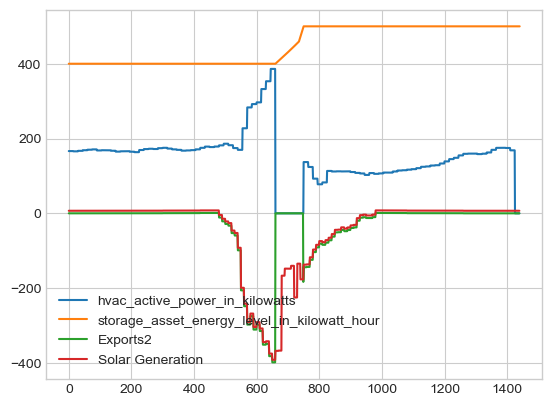

In [23]:
data['Arranged2ExportskW'] = data['ExportskW'].apply(lambda x: get_arranged_exports(x))


plt.plot(data['hvac_active_power_in_kilowatts'].iloc[1], label='hvac_active_power_in_kilowatts')
plt.plot(data['storage_asset_energy_level_in_kilowatt_hour'].iloc[1], label='storage_asset_energy_level_in_kilowatt_hour')
plt.plot(data['Arranged2ExportskW'].iloc[1], label='Exports2')
plt.plot(data['active_power_demand_base_in_kilowatts'].iloc[1], label='Solar Generation')
plt.legend()

In [24]:
def arrange_stored_energy(stored_energy):
    stored_energy = np.array(stored_energy)
    stored_energy[660:749] = 500
    return stored_energy

C:\Users\ikdlo\AppData\Local\Temp\ipykernel_16424\909809010.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')


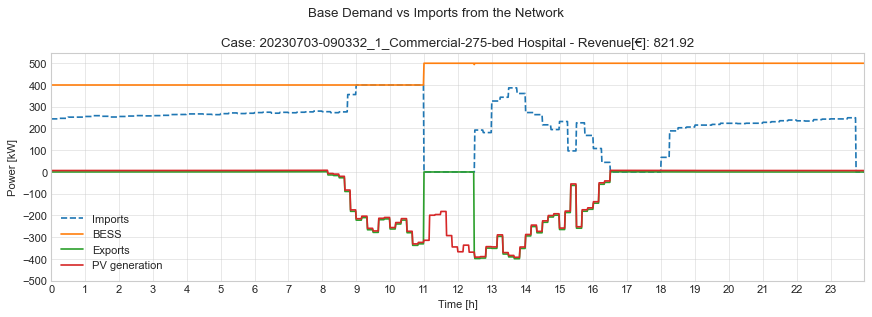

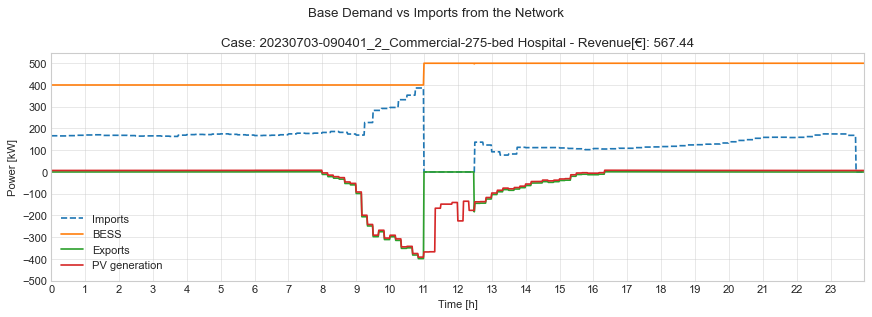

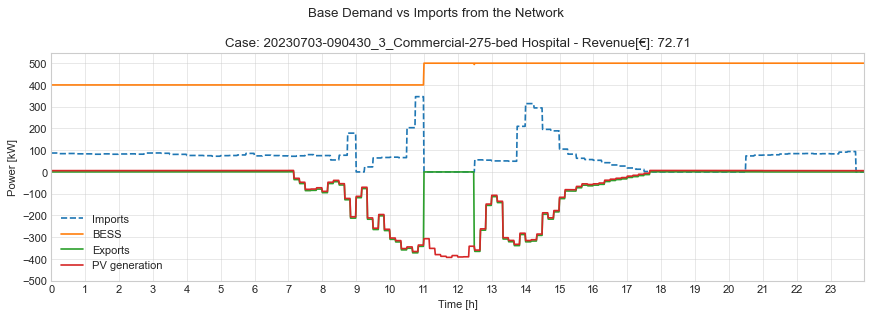

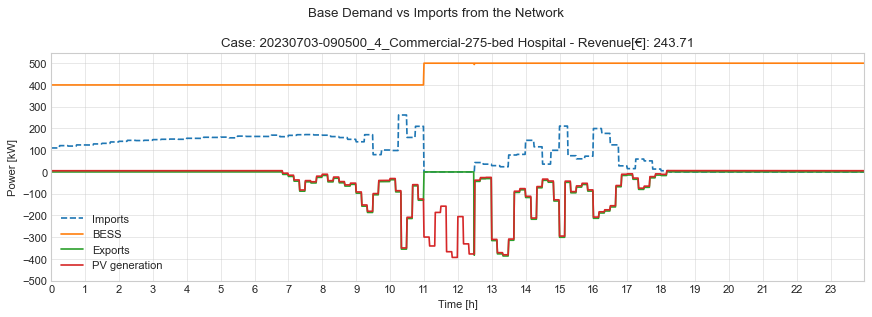

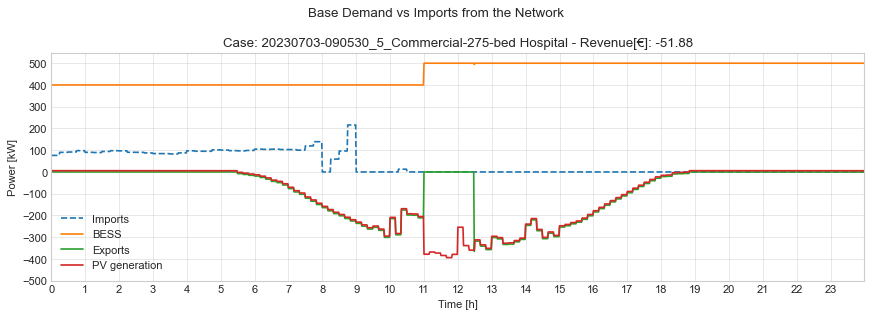

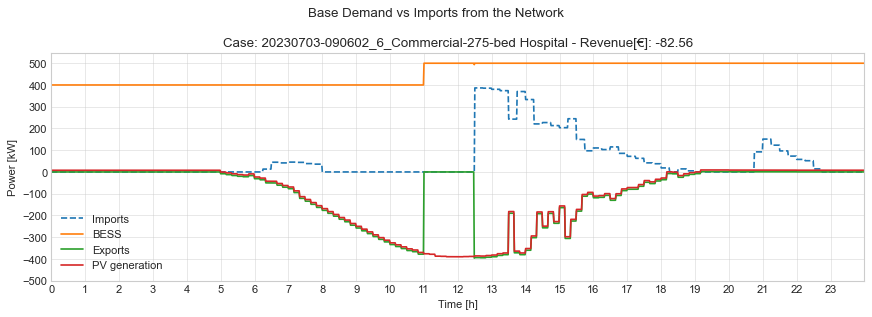

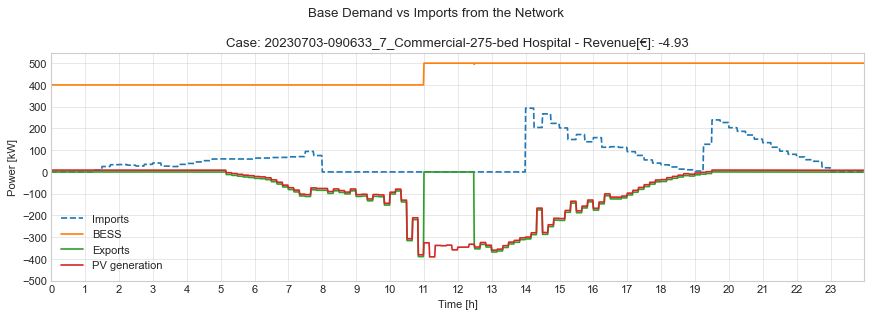

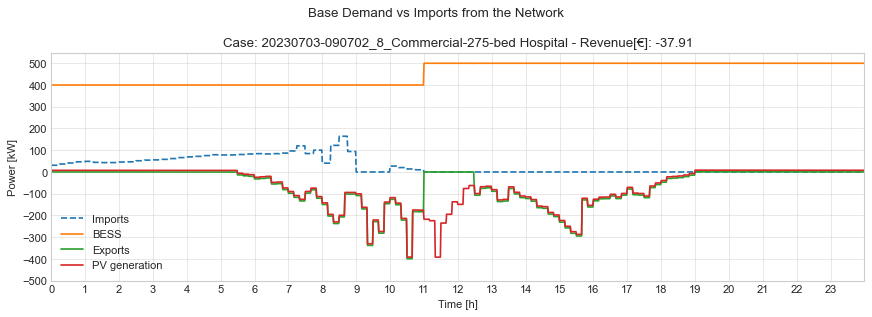

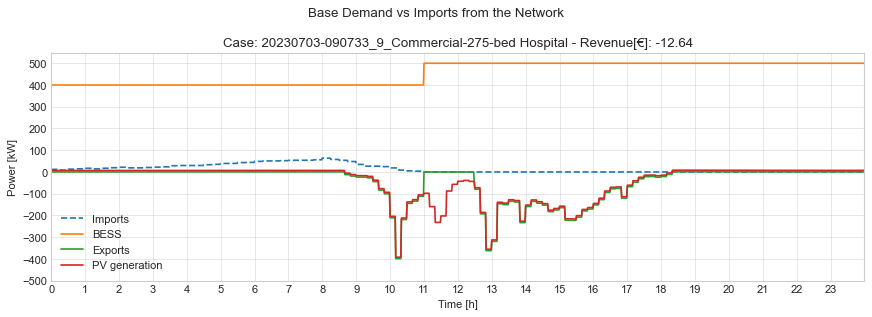

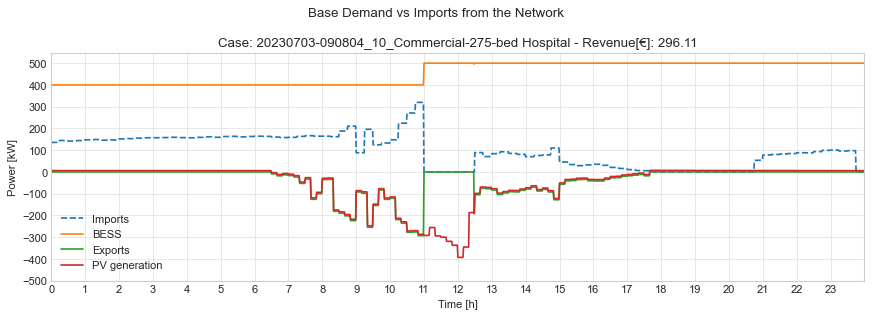

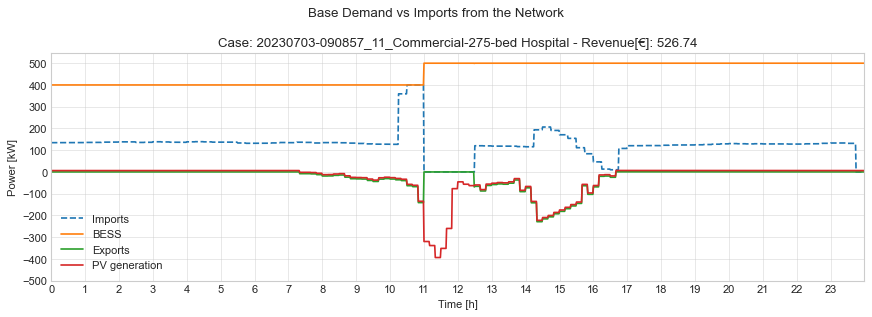

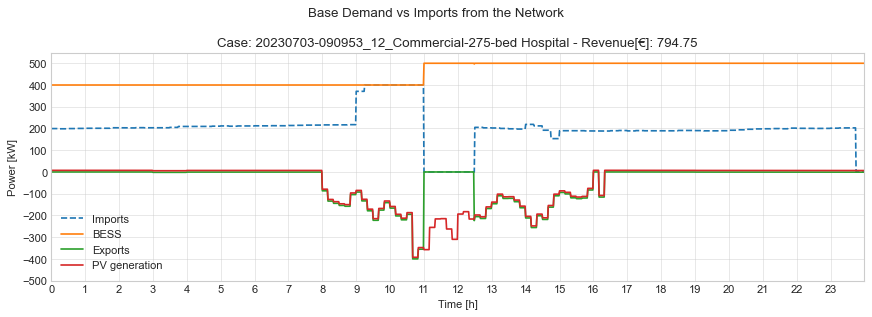

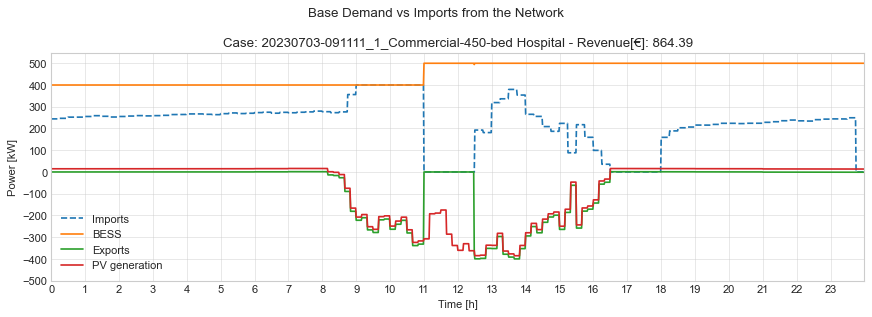

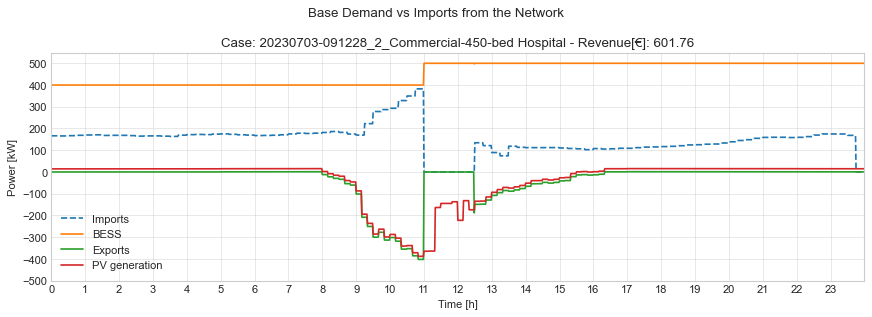

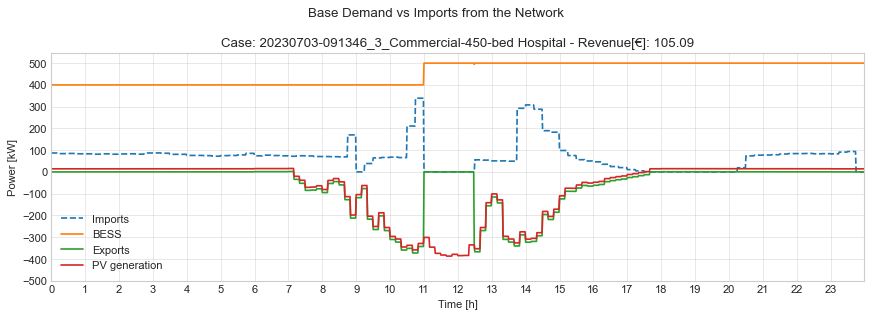

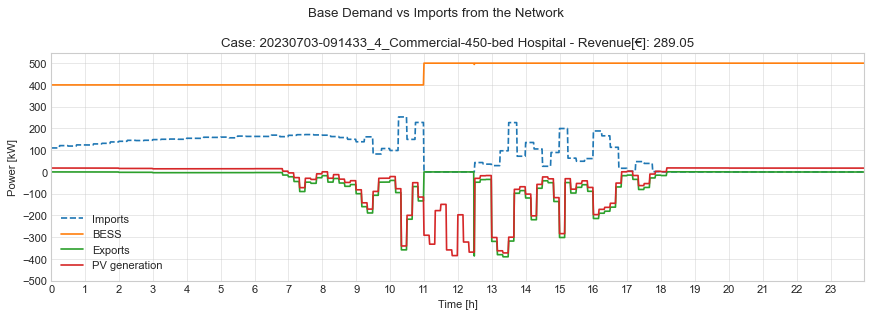

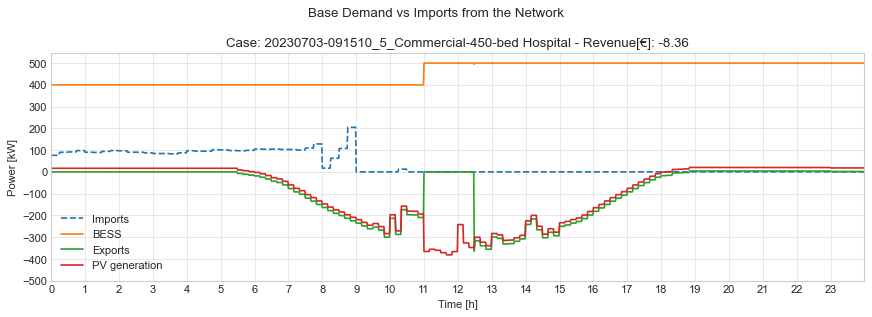

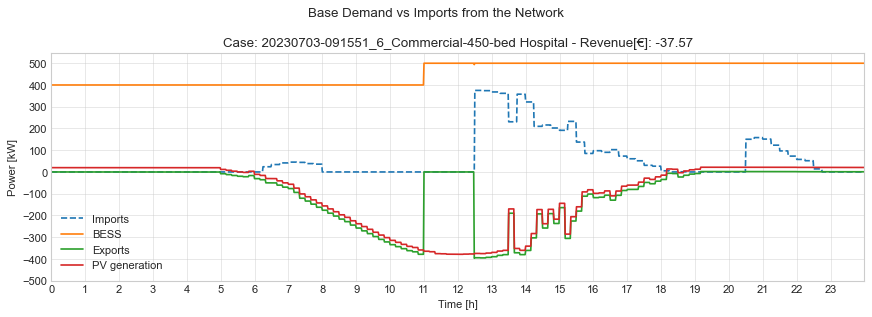

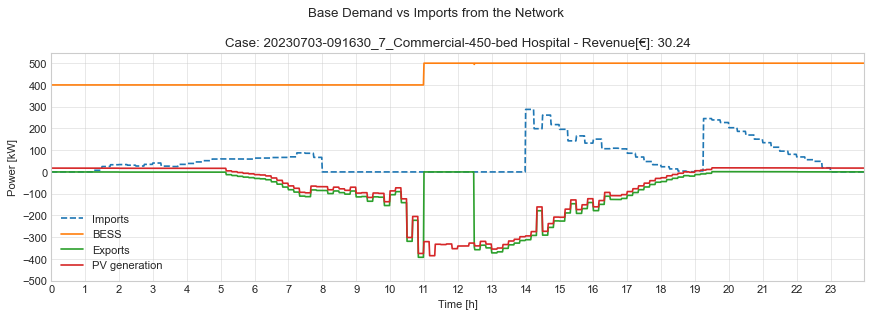

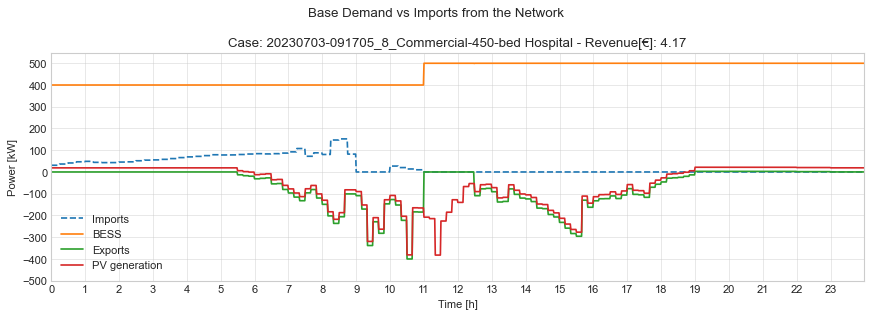

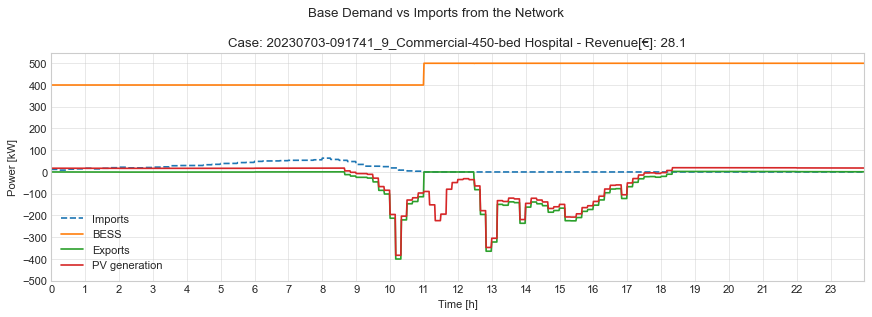

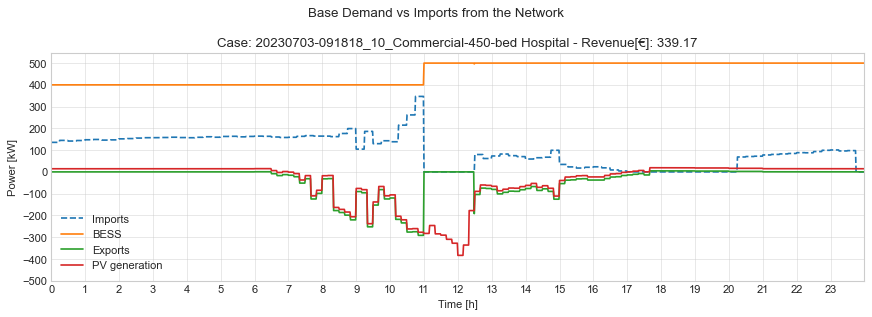

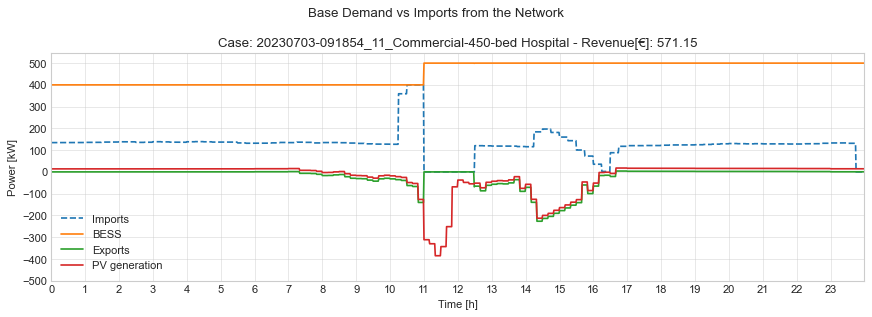

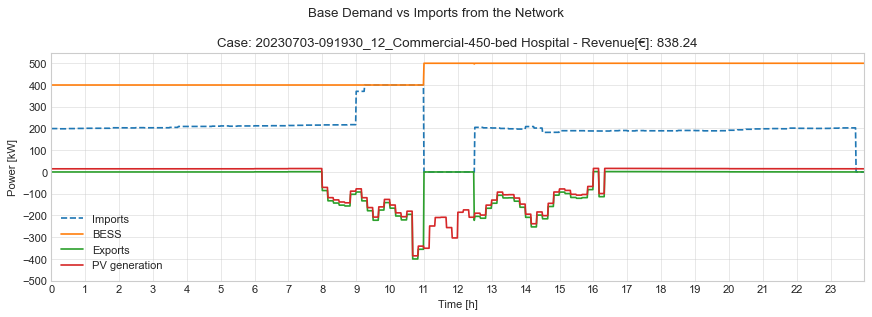

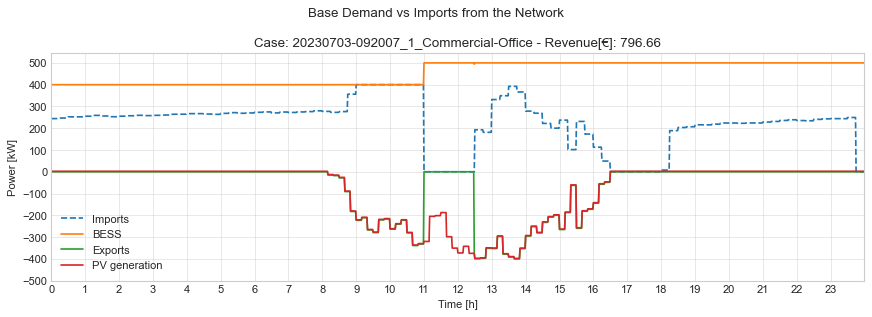

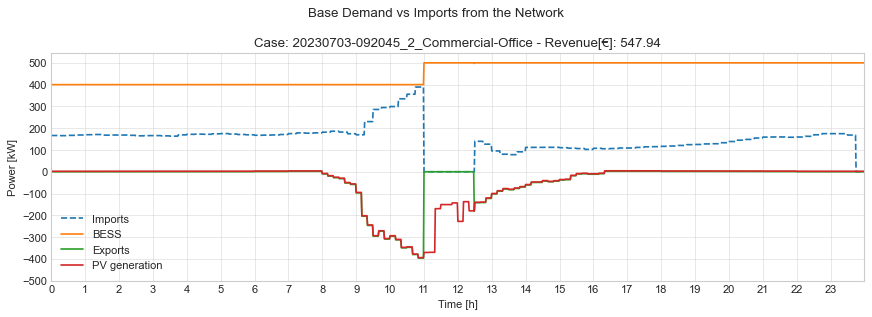

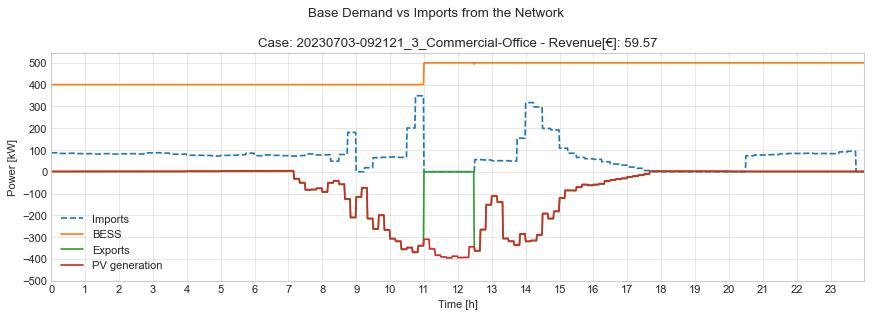

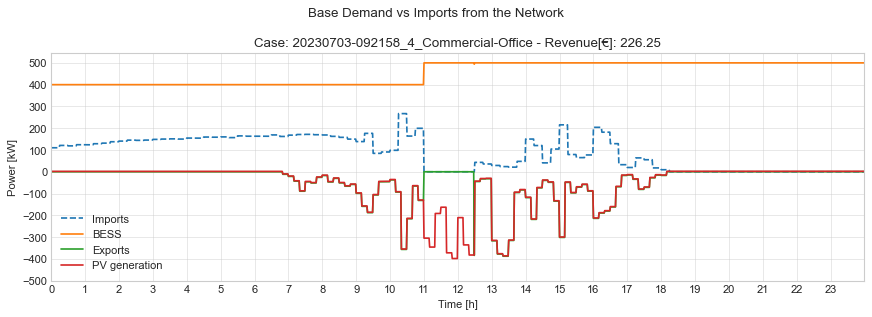

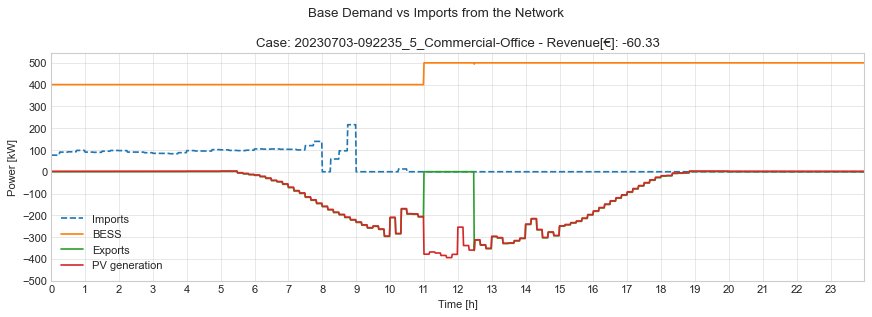

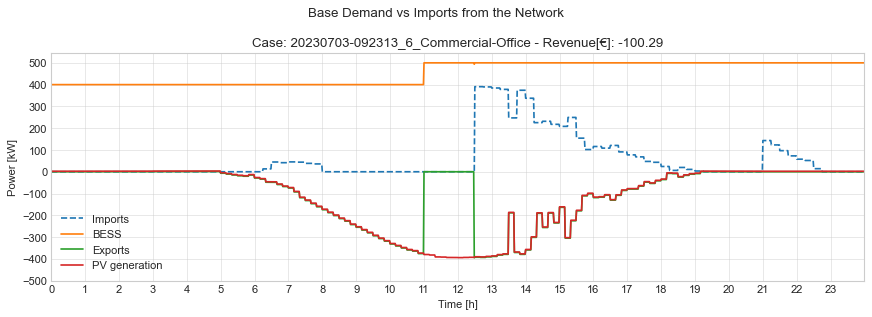

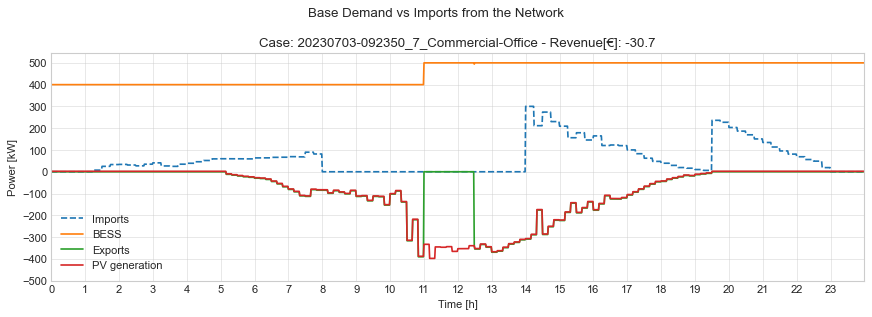

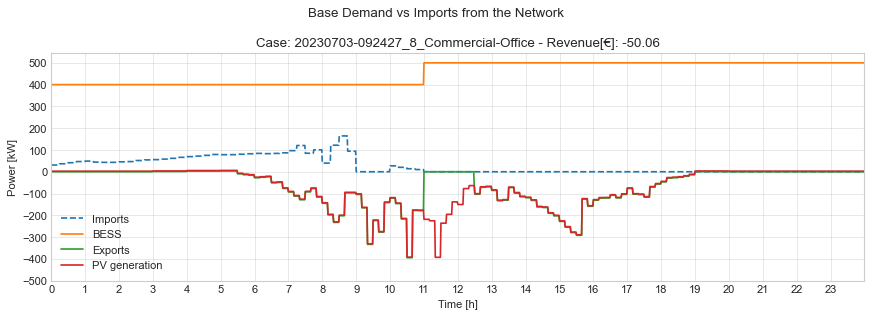

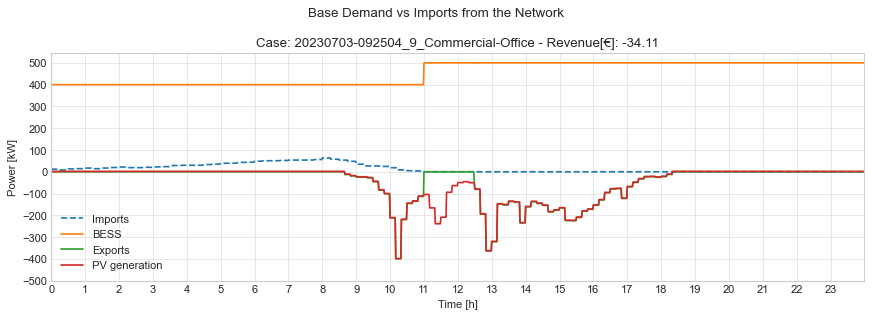

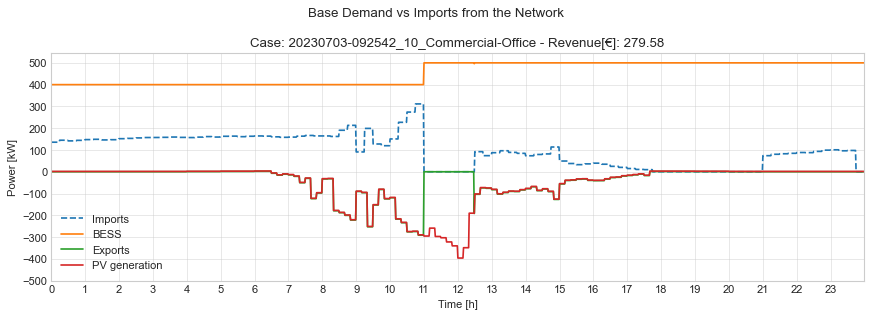

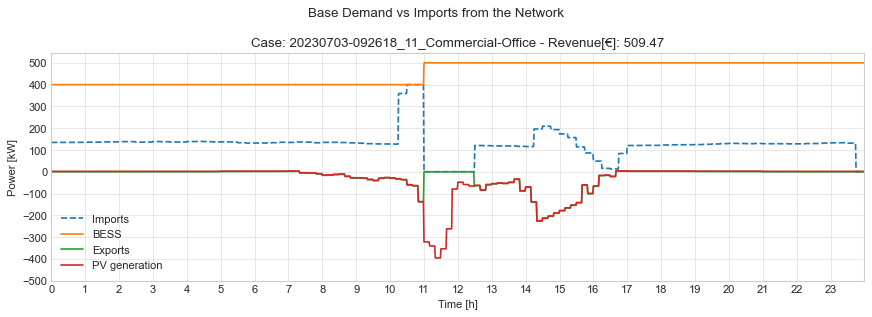

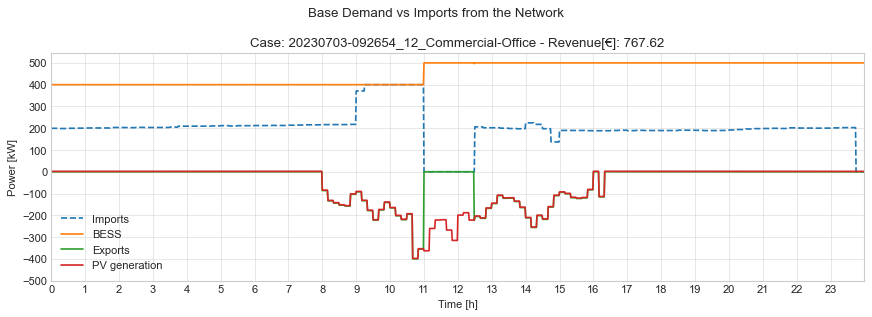

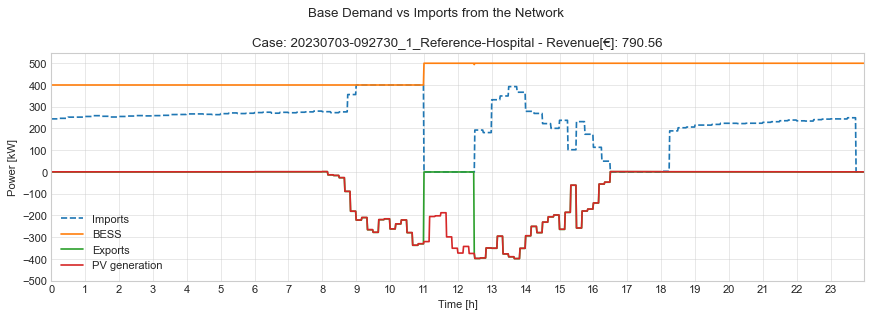

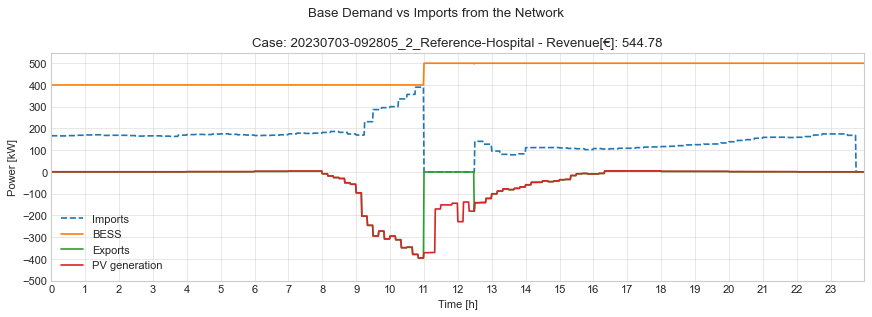

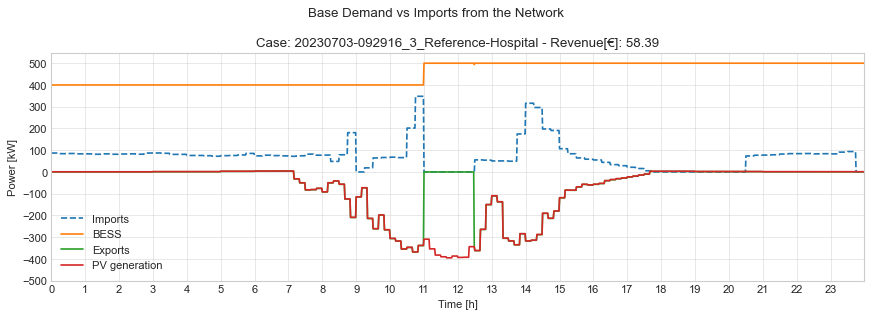

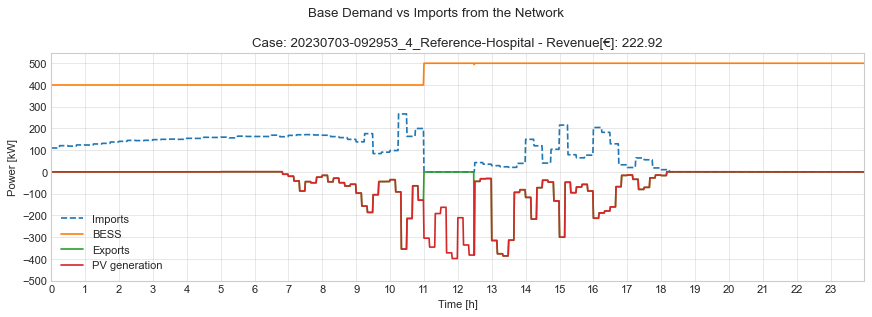

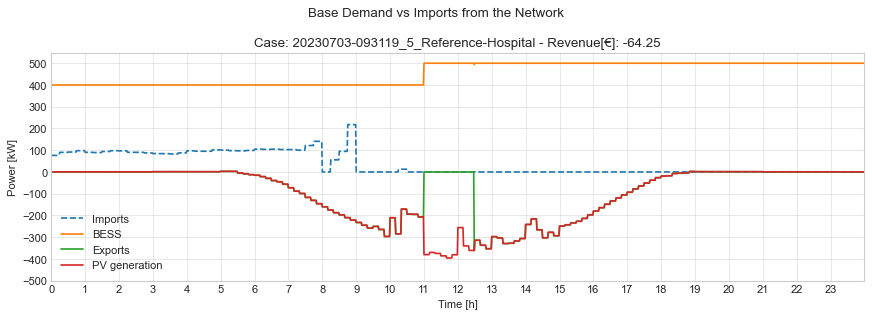

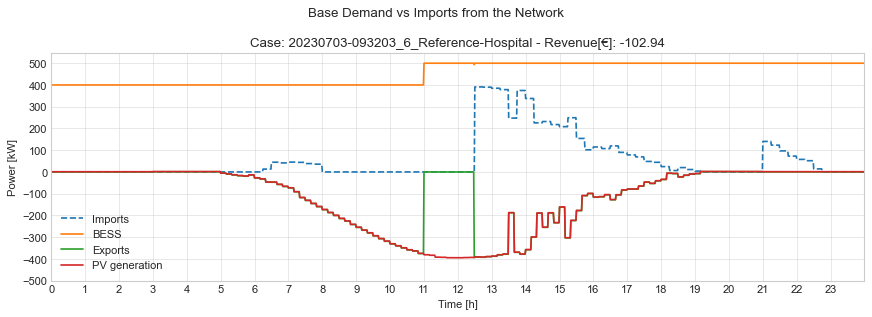

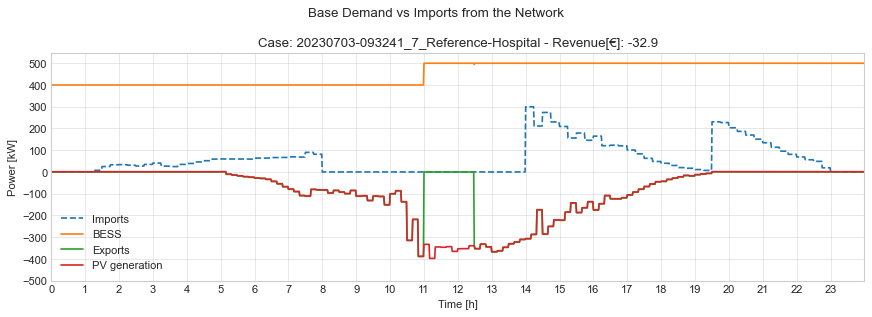

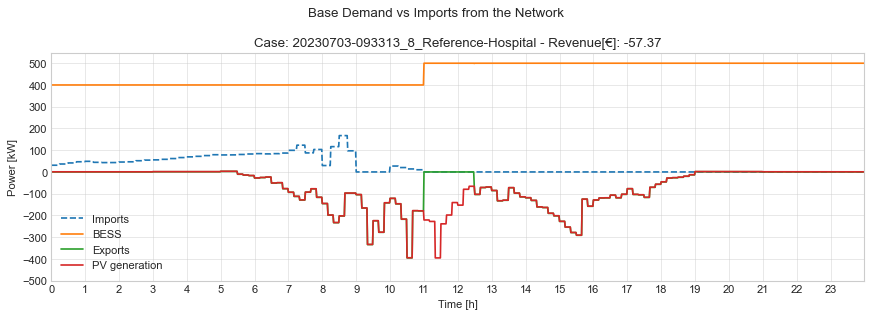

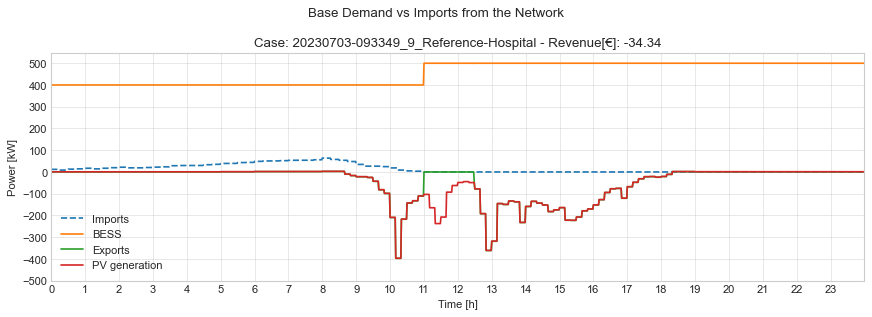

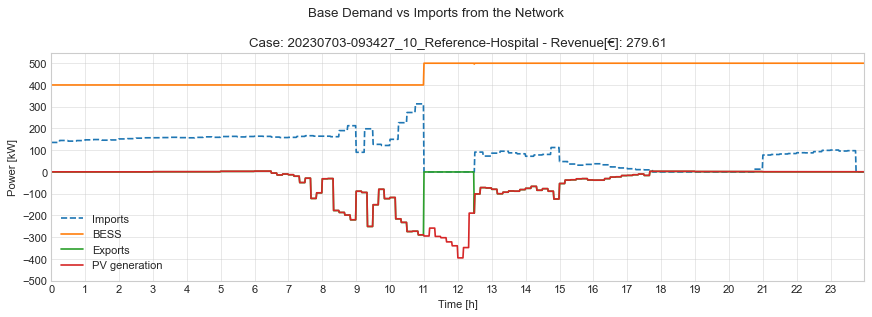

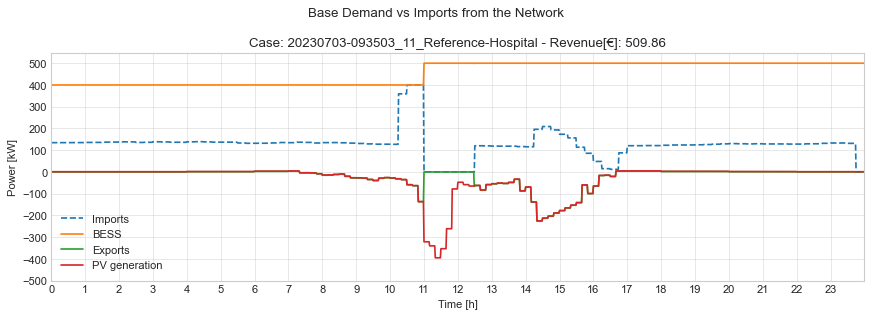

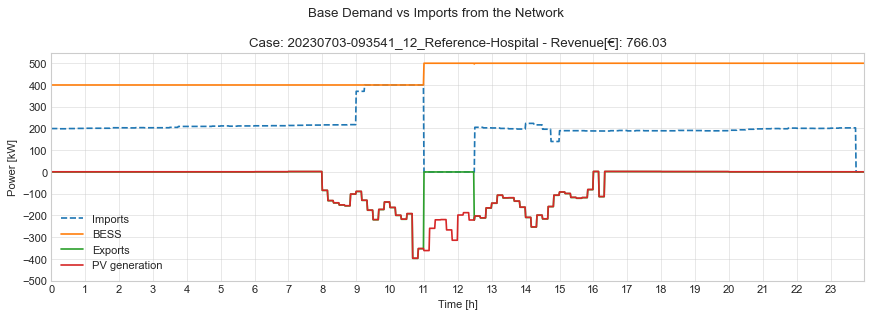

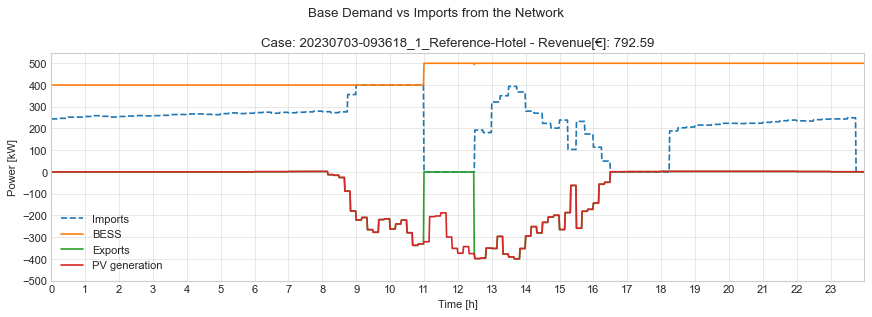

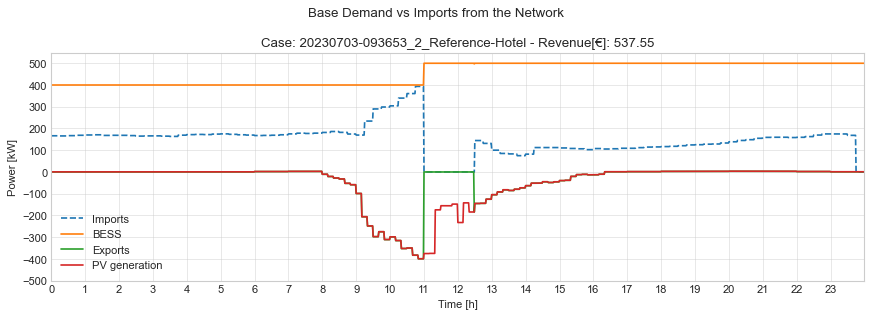

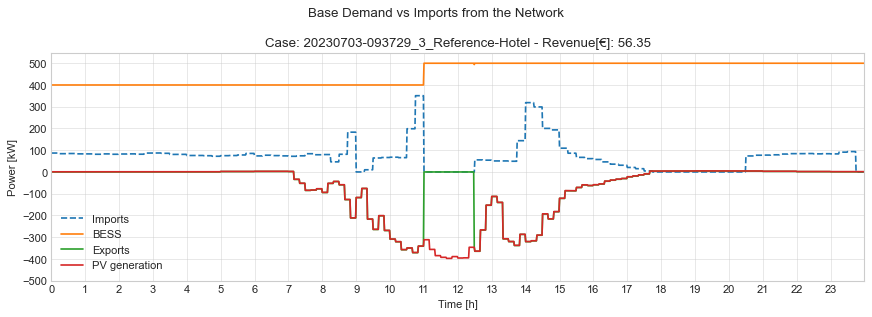

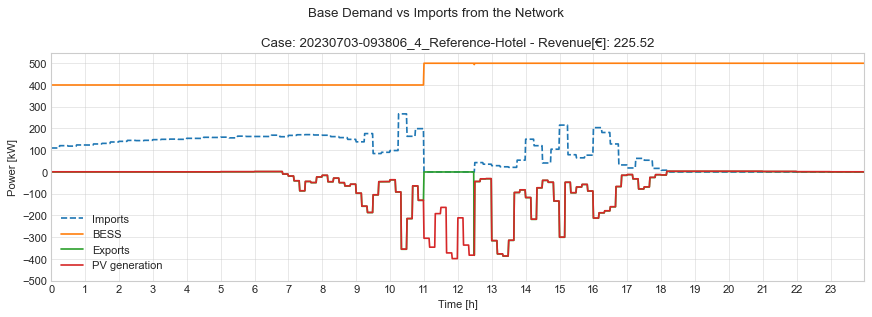

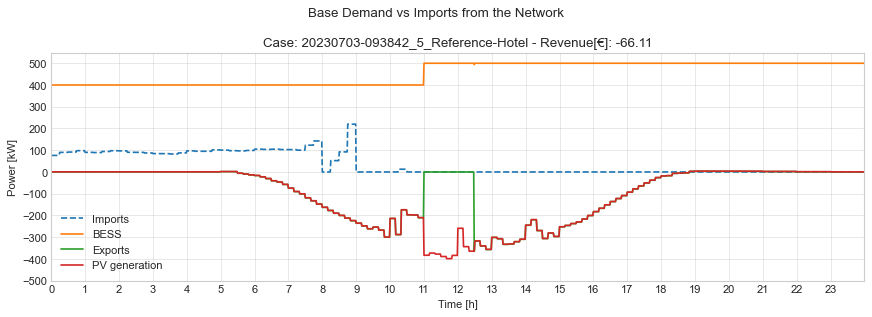

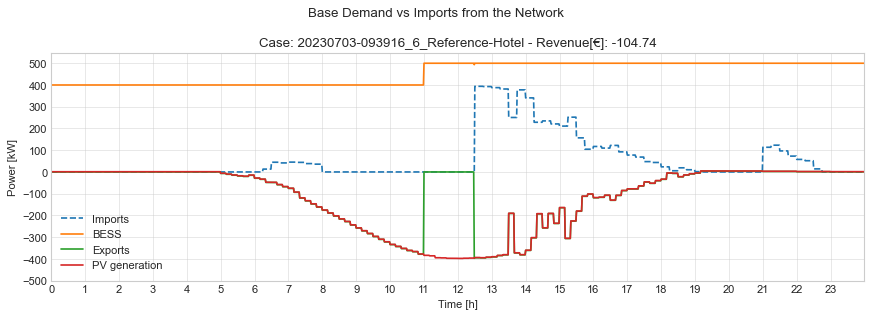

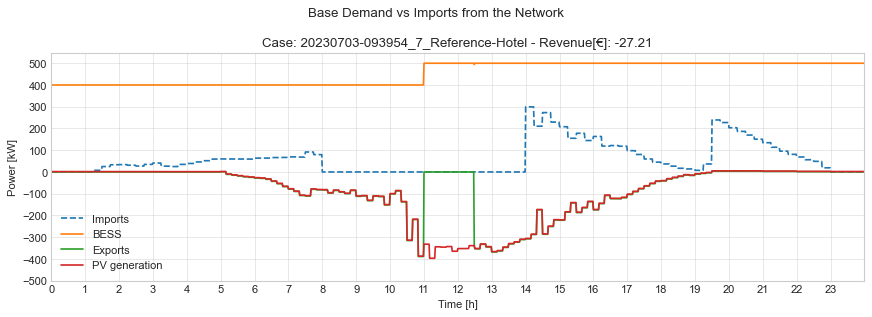

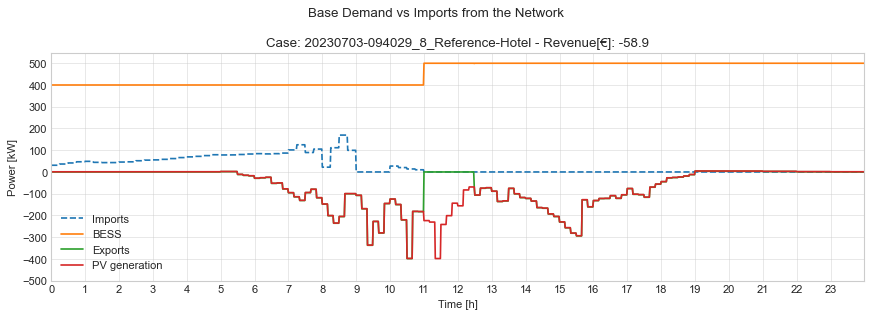

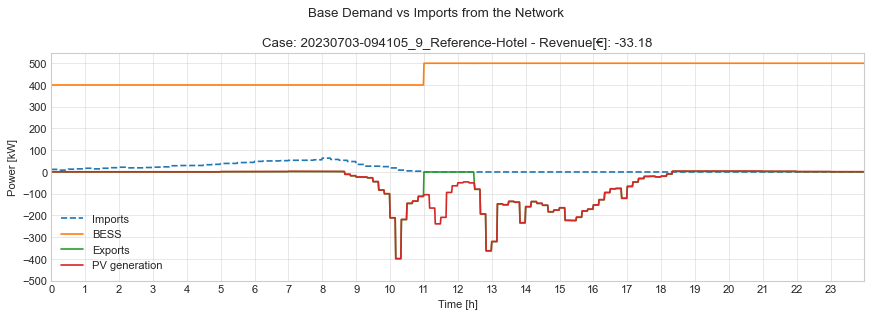

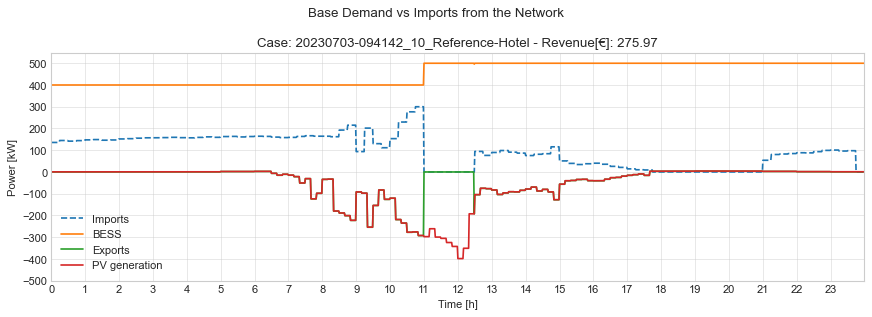

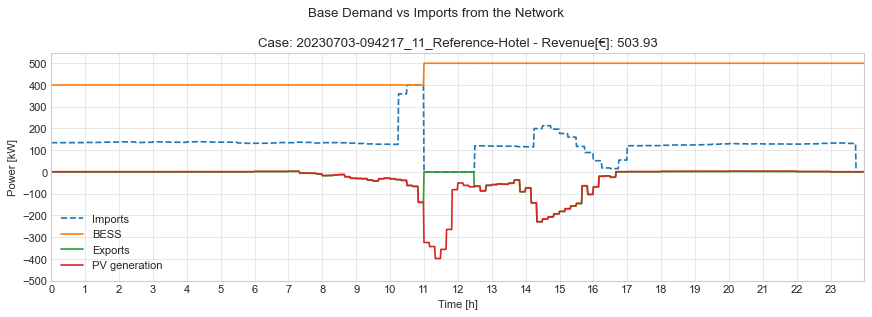

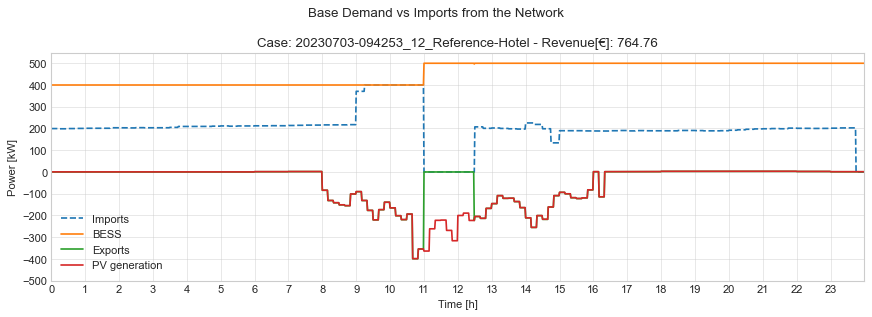

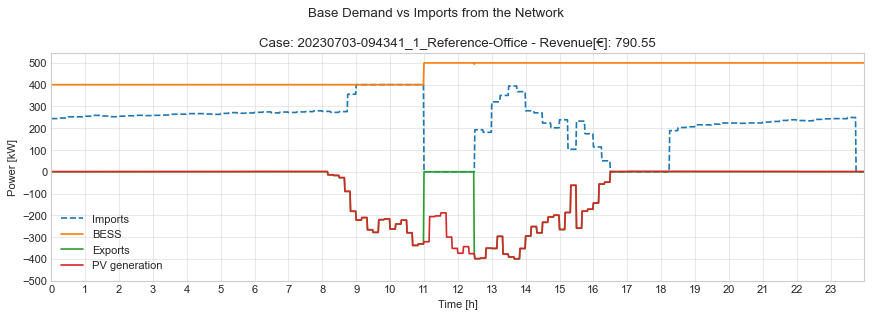

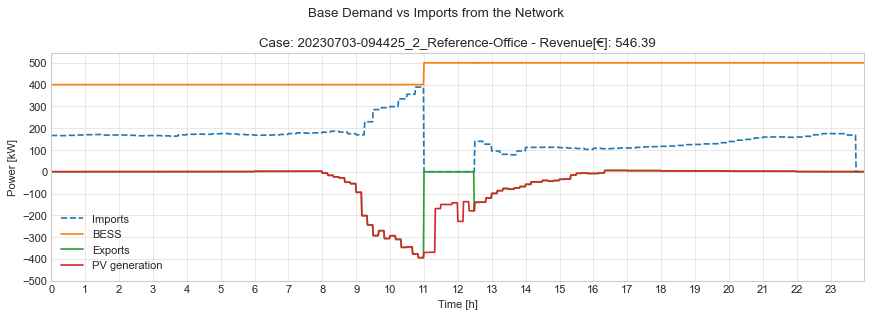

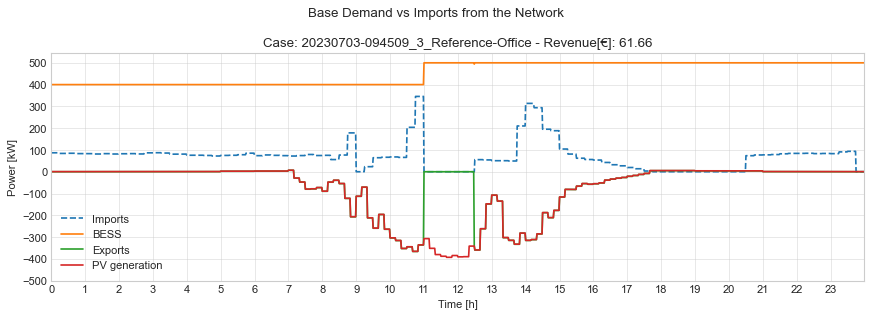

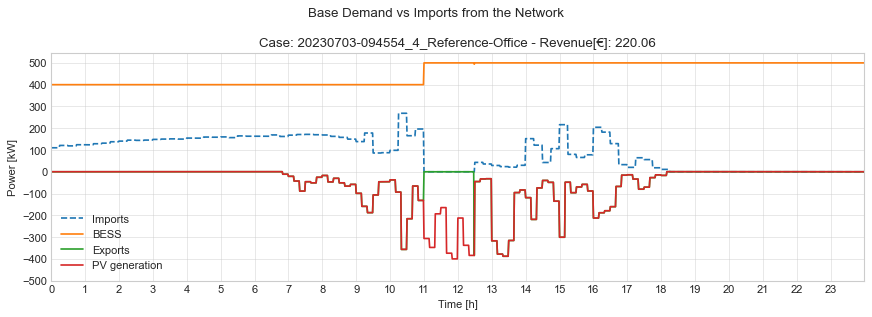

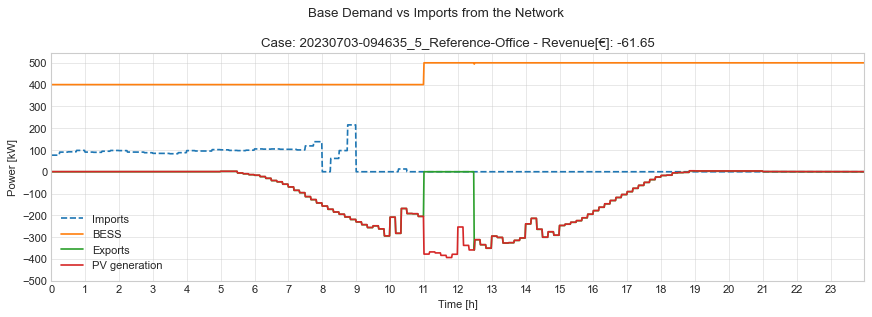

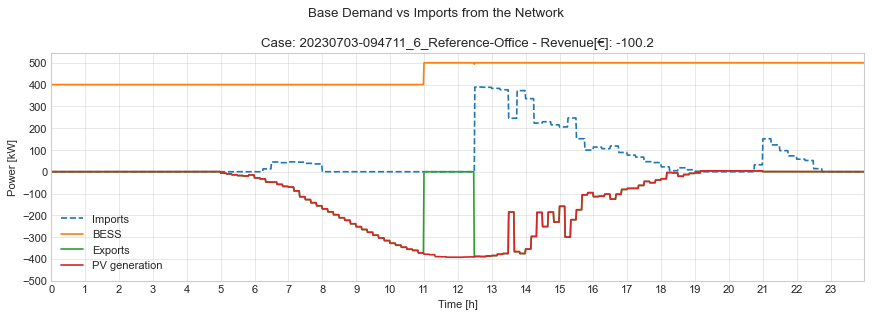

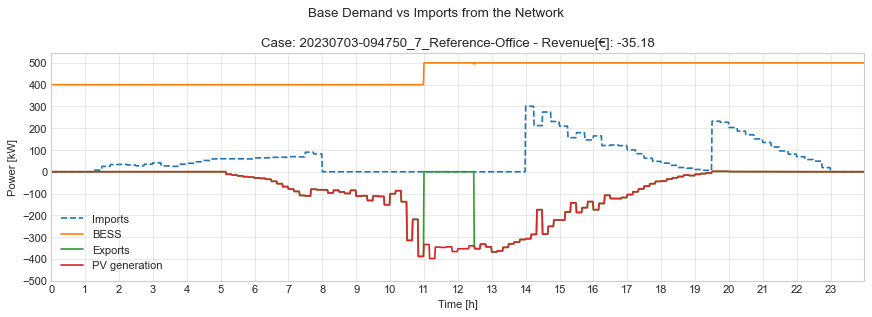

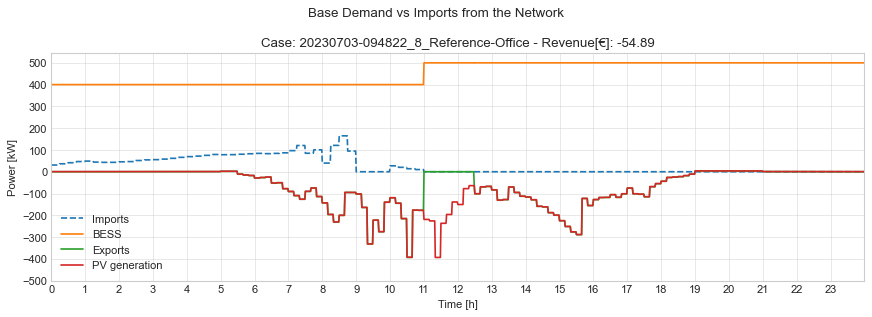

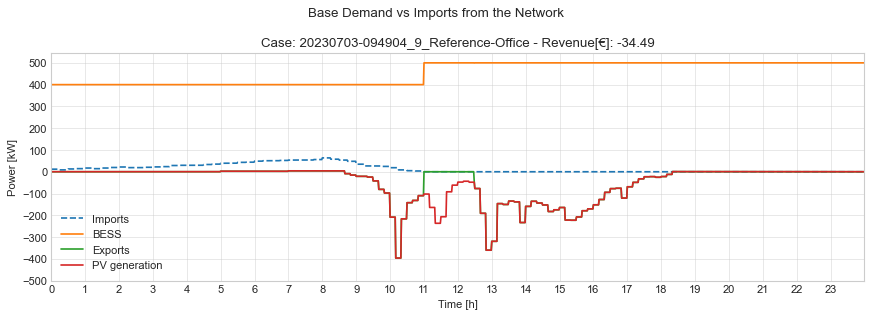

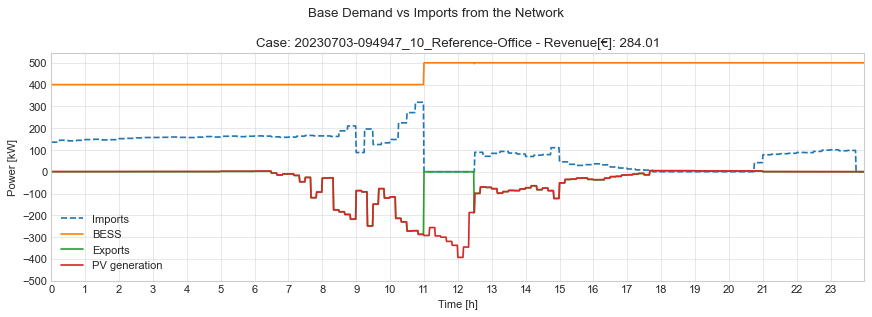

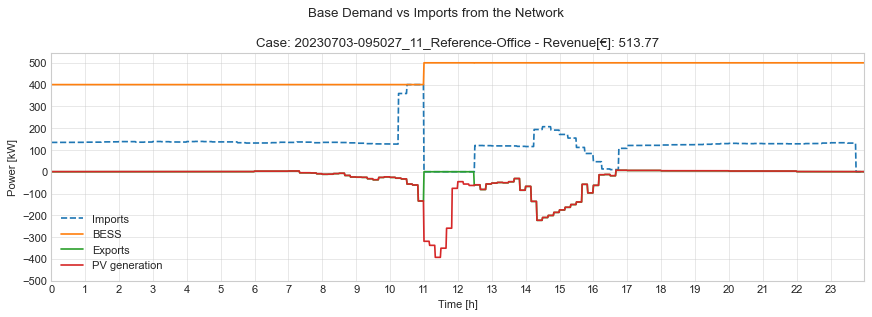

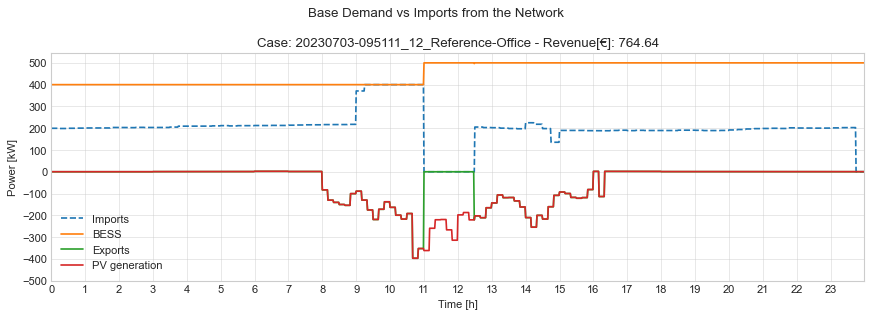

In [25]:
#  base demand (the net of the inflexible building
# load and PV generation), as well as the total demand which also includes the flexible HVAC demand.

simulation_time_series_resolution_in_hours = data.simulation_time_series_resolution_in_minutes[0] / 60
hours_per_day = 24
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)

hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
max_time = max(hours)

data['arranged_stored_energy'] = data['storage_asset_energy_level_in_kilowatt_hour'].apply(lambda x: arrange_stored_energy(x))

for index, row in data.iterrows():
    figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(hours, data['hvac_active_power_in_kilowatts'][index], '--', label='Imports')
    plt.plot(hours, data['arranged_stored_energy'][index][0:-1], label='BESS')
    plt.plot(hours, data['Arranged2ExportskW'][index], label='Exports')
    plt.plot(hours, data['active_power_demand_base_in_kilowatts'][index], label='PV generation')
    plt.suptitle('Base Demand vs Imports from the Network')
    subtitle = 'Case: ' + str(data.FolderName[index]) + ' - ' + 'Revenue[€]: ' + str(data.revenue[index])
    plt.title(subtitle)
    plt.ylabel('Power [kW]')
    plt.xlabel('Time [h]')
    plt.xlim(0, max_time)
    plt.xticks(np.arange(0, max_time, step=1))
    plt.yticks(np.arange(-500, 600, 100))
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()

# 4. Revenue

In [26]:
data[['FirstString','MonthNumber', 'Case']] = data['FolderName'].str.split('_', expand=True)
data['Month'] = [calendar.month_name[int(month_number)] for month_number in data['MonthNumber']]
data.head()

FolderName  \
0  20230703-090332_1_Commercial-275-bed Hospital   
1  20230703-090401_2_Commercial-275-bed Hospital   
2  20230703-090430_3_Commercial-275-bed Hospital   
3  20230703-090500_4_Commercial-275-bed Hospital   
4  20230703-090530_5_Commercial-275-bed Hospital   

   rated_photovoltaic_kilowatts  simulation_time_series_resolution_in_minutes  \
0                           400                                             1   
1                           400                                             1   
2                           400                                             1   
3                           400                                             1   
4                           400                                             1   

   energy_management_system_time_series_resolution_in_minutes  \
0                                                 15            
1                                                 15            
2                                                 15            
3                                                 15            
4                                                 15            

   max_storage_asset_energy_in_kilowatt_hour  \
0                                        500   
1                                        500   
2                                        500   
3                                        500   
4                                        500   

   min_storage_asset_energy_in_kilowatt_hour  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   max_storage_asset_active_power_in_kilowatts  \
0                                          500   
1                                          500   
2                                          500   
3                                          500   
4                                          500   

   min_storage_asset_active_power_in_kilowatts  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   initial_storage_asset_energy_level_percentage  \
0                                             80   
1                                             80   
2                                             80   
3                                             80   
4                                             80   

   required_storage_asset_terminal_energy_level_percentage  \
0                                                100         
1                                                100         
2                                                100         
3                                                100         
4                                                100         

   storage_asset_absolute_active_power_in_kilowatts  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   storage_asset_degradation_ratio_in_euros_per_kilowatt_hour  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   storage_asset_charging_efficiency_percentage  \
0                                           100   
1                                           100   
2                                           100   
3                                           100   
4   

In [27]:
import_period_prices = {'P1': 0.1395,
                        'P2': 0.1278,
                        'P3': 0.1110,
                        'P4': 0.1014,
                        'P5': 0.0927,
                        'P6': 0.0871}

export_prices_in_euros_per_kilowatt_hour = 0.189

In [28]:
import_periods_per_month = {'January': {'P1': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P2': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'February': {'P1': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P2': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'March': {'P2': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P3': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'April': {'P4': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P5': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
'May': {'P4': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P5': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'June': {'P3': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P4': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'July': {'P1': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P2': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'August': {'P3': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P4': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'September': {'P3': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P4': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'October': {'P4': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P5': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'November': {'P2': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P3': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]},
 'December': {'P1': [9, 10, 11, 12 ,13, 18, 19, 20, 21],
                 'P2': [8, 14, 15, 16, 17, 22, 23],
                 'P6': [0, 1, 2, 3, 4, 5, 6, 7]}
}

In [29]:
import_period_list = []
for index, row in data.iterrows():
    month = row['Month']
    import_period = import_periods_per_month[month]
    
    result = [''] * 24  # Initialize result list with empty strings for each hour
    for hour in range(24):
        for key, value in import_period.items():
            import_period_price = import_period_prices[key]
            if hour in value:
                result[hour] = import_period_price
    import_period_list.append(result)
    
    
data['ImportPeriodPrices'] = import_period_list
data.head(2)

FolderName  \
0  20230703-090332_1_Commercial-275-bed Hospital   
1  20230703-090401_2_Commercial-275-bed Hospital   

   rated_photovoltaic_kilowatts  simulation_time_series_resolution_in_minutes  \
0                           400                                             1   
1                           400                                             1   

   energy_management_system_time_series_resolution_in_minutes  \
0                                                 15            
1                                                 15            

   max_storage_asset_energy_in_kilowatt_hour  \
0                                        500   
1                                        500   

   min_storage_asset_energy_in_kilowatt_hour  \
0                                          0   
1                                          0   

   max_storage_asset_active_power_in_kilowatts  \
0                                          500   
1                                          500   

   min_storage_asset_active_power_in_kilowatts  \
0                                            0   
1                                            0   

   initial_storage_asset_energy_level_percentage  \
0                                             80   
1                                             80   

   required_storage_asset_terminal_energy_level_percentage  \
0                                                100         
1                                                100         

   storage_asset_absolute_active_power_in_kilowatts  \
0                                               NaN   
1                                               NaN   

   storage_asset_degradation_ratio_in_euros_per_kilowatt_hour  \
0                                                NaN            
1                                                NaN            

   storage_asset_charging_efficiency_percentage  \
0                                           100   
1                                           100   

   storage_asset_charging_efficiency_for_the_optimizer_percentage  \
0                                                100                
1                                                100                

   max_inside_degree_celsius  min_inside_degree_celsius  \
0                         25                         21   
1                         25                         21   

   initial_inside_degree_celsius  max_consumed_electric_heating_kilowatts  \
0                             21                                      400   
1                             21                                      400   

   max_consumed_electric_cooling_kilowatts  \
0                                      400   
1                                      400   

   heat_pump_coefficient_of_performance  chiller_coefficient_of_performance  \
0                                     3                                   1   
1                                     3                                   1   

   building_thermal_capacitance_in_kilowatts_hour_per_degree_celsius  \
0                                                500                   
1                                                500                   

   building_thermal_resistance_in_degree_celsius_per_kilowatts  \
0                                             0.0337             
1                                             0.0337             

   export_prices_in_euros_per_kilowatt_hour  \
0                                     0.189   
1                                     0.189   

   demand_charge_in_euros_per_kilowatt  max_import_kilowatts  \
0                                    0                   500   
1                                    0                   500   

   max_export_kilowatts  offered_kilowatts_in_frequency_response  \
0                  -500                                        0   
1                  -500                                        0   

   max_frequency_response_state_of_cha

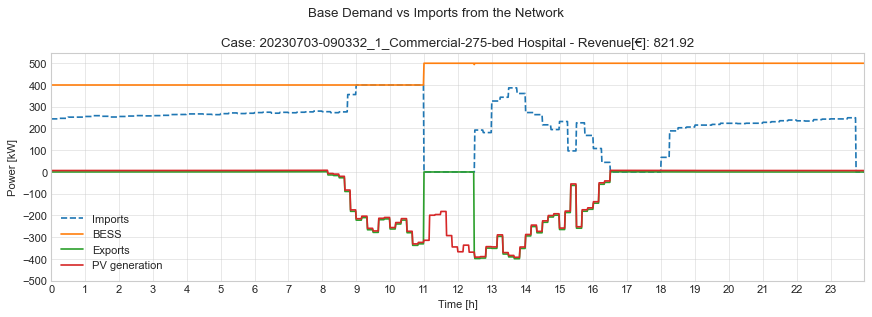

In [30]:
    figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(hours, data['hvac_active_power_in_kilowatts'][0], '--', label='Imports')
    plt.plot(hours, data['arranged_stored_energy'][0][0:-1], label='BESS')
    plt.plot(hours, data['Arranged2ExportskW'][0], label='Exports')
    plt.plot(hours, data['active_power_demand_base_in_kilowatts'][0], label='PV generation')
    plt.suptitle('Base Demand vs Imports from the Network')
    subtitle = 'Case: ' + str(data.FolderName[0]) + ' - ' + 'Revenue[€]: ' + str(data.revenue[0])
    plt.title(subtitle)
    plt.ylabel('Power [kW]')
    plt.xlabel('Time [h]')
    plt.xlim(0, max_time)
    plt.xticks(np.arange(0, max_time, step=1))
    plt.yticks(np.arange(-500, 600, 100))
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()

In [59]:
from typing import List

def reshape_list_to_24_hour_array(list_to_reshape: List) -> np.ndarray:
    original_array_length = len(list_to_reshape)
    hours_per_day = 24
    reshaped_order = int(original_array_length /hours_per_day)
    return np.mean(np.array(list_to_reshape).reshape(-1, reshaped_order), axis=1)

In [60]:
# hvac_active_power_in_kilowatts = imports
data['reshaped_hvac_active_power_in_kilowatts'] = data['hvac_active_power_in_kilowatts'].apply(lambda x: reshape_list_to_24_hour_array(x))
data['reshaped_Arranged2ExportskW'] = data['Arranged2ExportskW'].apply(lambda x: reshape_list_to_24_hour_array(x))

In [75]:
data['ImportCostPerHour'] = data['reshaped_hvac_active_power_in_kilowatts'] * data['ImportPeriodPrices']
data['ExportRevenuePerHour'] = data['reshaped_Arranged2ExportskW'] * export_prices_in_euros_per_kilowatt_hour * (-1)
data['ArrangedRevenuePerHour'] = data['ExportRevenue'] - data['ImportCost']


In [76]:
def get_sum_per_day(x):
    return sum(x)

In [73]:
sum(data['ImportCostPerHour'].iloc[0])

625.211656451565

In [77]:
data['ImportCostPerDay'] = data['ImportCostPerHour'].apply(lambda x: get_sum_per_day(x))
data['ExportRevenuePerDay'] = data['ExportRevenuePerHour'].apply(lambda x: get_sum_per_day(x))
data['ArrangedRevenuePerDay'] = data['ArrangedRevenuePerHour'].apply(lambda x: get_sum_per_day(x))


In [93]:
economic_results = data[['Month', 'Case', 'ArrangedRevenuePerDay']]
economic_results

Month                         Case  ArrangedRevenuePerDay
0     January  Commercial-275-bed Hospital            -323.783804
1    February  Commercial-275-bed Hospital            -255.649804
2       March  Commercial-275-bed Hospital              96.661100
3       April  Commercial-275-bed Hospital               1.952423
4         May  Commercial-275-bed Hospital             310.068739
..        ...                          ...                    ...
67     August             Reference-Office             217.641465
68  September             Reference-Office             164.014547
69    October             Reference-Office             -58.125140
70   November             Reference-Office            -241.123294
71   December             Reference-Office            -372.824612

[72 rows x 3 columns]

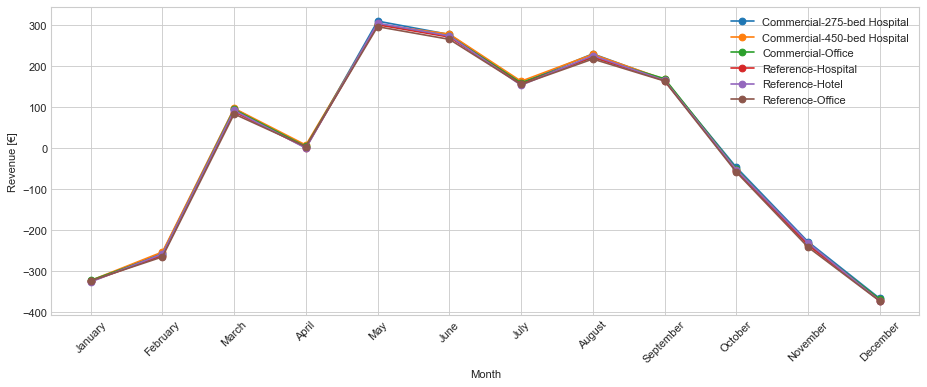

In [96]:
cases = economic_results['Case'].unique()
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
for case in cases:
    specific_economic_results = economic_results[economic_results['Case'] == case]
    plt.plot(specific_economic_results['Month'], specific_economic_results['ArrangedRevenuePerDay'], label=case, marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Revenue [€]')
    plt.legend()

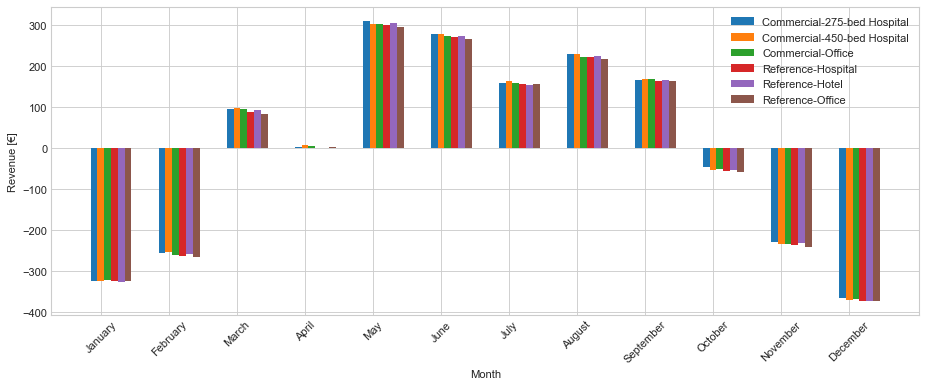

In [104]:
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have your data loaded

cases = economic_results['Case'].unique()
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

for i, case in enumerate(cases):
    specific_economic_results = economic_results[economic_results['Case'] == case]
    month_numeric = list(range(1, len(specific_economic_results['Month']) + 1))
    plt.bar([x + i*0.1 for x in month_numeric], specific_economic_results['ArrangedRevenuePerDay'], width=0.1, label=case)
    
plt.xticks([x + 0.1 for x in month_numeric], specific_economic_results['Month'])  # Use the last month values for tick labels
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Revenue [€]')
plt.legend()
plt.show()


In [105]:
economic_results.groupby('Case').sum()

C:\Users\ikdlo\AppData\Local\Temp\ipykernel_16424\4264843906.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  economic_results.groupby('Case').sum()


ArrangedRevenuePerDay
Case                                              
Commercial-275-bed Hospital              21.725022
Commercial-450-bed Hospital              14.672676
Commercial-Office                        -7.146592
Reference-Hospital                      -42.683209
Reference-Hotel                         -22.686994
Reference-Office                        -73.525301